In [1]:
h5ad_path = "/mnt/workspace_stud/mbentse/catlas_objects/esophagus_muscularis_SM-A8CPH.h5ad"
#h5ad_path = "/mnt/workspace_stud/mbentse/catlas_objects/heart_lv_SM-IOBHO.h5ad"

data_folder = "/mnt/workspace_stud/allstud/wp1/data"

metadata_url = "http://catlas.org/catlas_downloads/humantissues/Cell_metadata.tsv.gz"
metadata_filename = "Cell_metadata.tsv"
metadata_path = f"{data_folder}/catlas_metadata/{metadata_filename}"

gtf_url="https://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_human/release_38/gencode.v38.annotation.gtf.gz"
gtf_filename="gencode.v38.annotation.gtf"
gtf_path=f"{data_folder}/{gtf_filename}"

In [2]:
import os.path

import episcanpy as epi
import scanpy as sc
import numpy as np
import anndata as ad
import pandas as pd

%load_ext autoreload
%autoreload 2

import utils

In [3]:
adata = epi.read_h5ad(h5ad_path)

In [4]:
sc.pp.calculate_qc_metrics(adata=adata, percent_top=None, inplace=True)

In [5]:
utils.download(metadata_path, metadata_url)

/mnt/workspace_stud/allstud/wp1/data/catlas_metadata/Cell_metadata.tsv already exists.


In [6]:
utils.load_metadata(adata, metadata_path, columns_to_keep=['cell type'])

In [7]:
adata.obs

,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,cell type
esophagus_muscularis_SM-A8CPH_1+AAGCTATACCGCTTCTCACAAG,6264,8.742734,10835.0,9.290629,Naive T cell
esophagus_muscularis_SM-A8CPH_1+AATTCGGATGAAATGCTACGGG,827,6.719013,1365.0,7.219642,Naive T cell
esophagus_muscularis_SM-A8CPH_1+ACTGCACAGAGTCCAGATTTCC,2334,7.755767,4000.0,8.294300,Naive T cell
esophagus_muscularis_SM-A8CPH_1+AGGTCACTGAGCTTACAATCGT,768,6.645091,1181.0,7.074963,Naive T cell
esophagus_muscularis_SM-A8CPH_1+AGTCGGAACGCCCAAGATCGAC,2940,7.986505,4891.0,8.495357,Naive T cell
...,...,...,...,...,...
esophagus_muscularis_SM-A8CPH_1+CCATCTGGCATGCGATCGTTAG,1612,7.385851,2685.0,7.895808,Fibroblast (Gastrointestinal)
esophagus_muscularis_SM-A8CPH_1+TTATGGATGCAAAGGATCGGCT,539,6.291569,888.0,6.790097,Fibroblast (Gastrointestinal)
esophagus_muscularis_SM-A8CPH_1+ACGTGTTGGTGAGTGTGGCATA,1005,6.913737,1593.0,7.374002,Smooth Muscle (Colon) 1
esophagus_muscularis_SM-A8CPH_1+GGCACGAACAATACTAAGCGCT,1209,7.098376,1920.0,7.560601,Smooth Muscle (Colon) 1


In [8]:
utils.download(gtf_path, gtf_url)

/mnt/workspace_stud/allstud/wp1/data/gencode.v38.annotation.gtf already exists.


In [9]:
%%time
utils.find_genes(adata,
        gtf_file=gtf_path,
        key_added='gene_annotation',
        upstream=5000,
        downstream=2000,
        feature_type='gene',
        annotation='HAVANA')

CPU times: user 11.4 s, sys: 1.24 s, total: 12.6 s
Wall time: 12.6 s


In [10]:
adata.var

,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,gene_annotation
index,,,,,,,
chr1:9955-10355,226,0.037738,0.037043,97.944894,415.0,6.030685,DDX11L1
chr1:29163-29563,3,0.000364,0.000364,99.972720,4.0,1.609438,MIR1302-2HG;WASH7P
chr1:79215-79615,0,0.000000,0.000000,100.000000,0.0,0.000000,intergenic
chr1:102755-103155,0,0.000000,0.000000,100.000000,0.0,0.000000,RP11-34P13.7
chr1:180580-180980,182,0.032827,0.032300,98.345003,361.0,5.891644,DDX11L17
...,...,...,...,...,...,...,...
chrY:56676947-56677347,0,0.000000,0.000000,100.000000,0.0,0.000000,intergenic
chrY:56677442-56677842,4,0.000364,0.000364,99.963626,4.0,1.609438,intergenic
chrY:56678029-56678429,11,0.001000,0.001000,99.899973,11.0,2.484907,intergenic


In [11]:
adata.raw = adata
epi.pp.binarize(adata)
adata.layers['binarized'] = adata.X.copy()

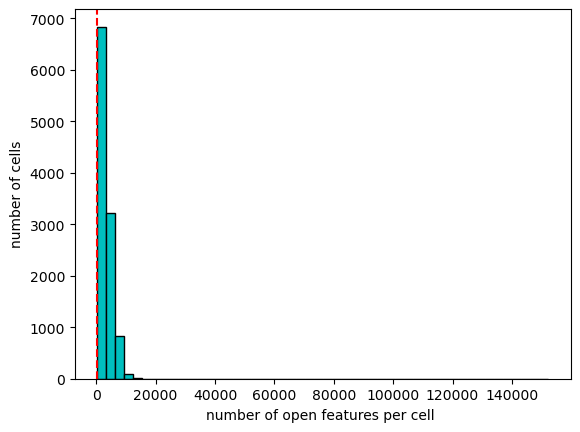

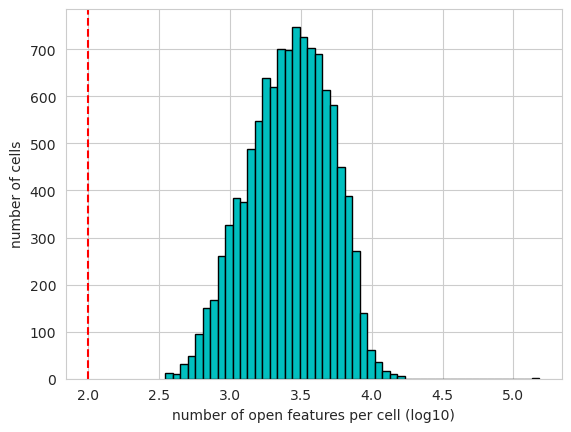


`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



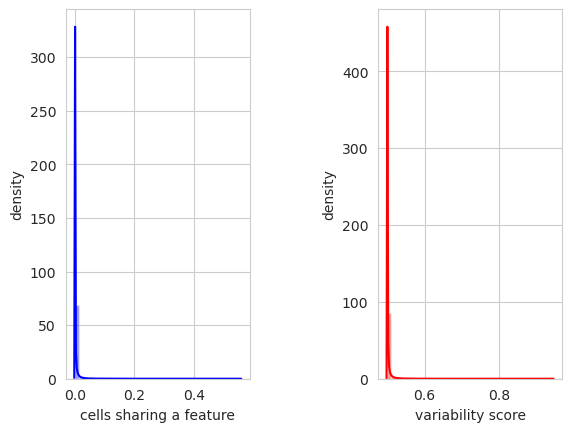

In [12]:
epi.pp.coverage_cells(adata, binary=True, log=False, bins=50,
               threshold=100)
epi.pp.coverage_cells(adata, binary=True, log=10, bins=50,
               threshold=100)

epi.pp.cal_var(adata)

In [13]:
epi.pp.filter_cells(adata, min_features=100)
epi.pp.filter_cells(adata, max_features=10000)

In [14]:
sc.pp.normalize_total(adata, exclude_highly_expressed=False, target_sum=None)
adata.layers['normalized'] = adata.X.copy()
epi.pp.log1p(adata)

In [ ]:
%%time
sc.pp.pca(adata, n_comps=50, use_highly_variable=False)

In [ ]:
sc.pl.pca_overview(adata, color="log1p_n_genes_by_counts")

In [ ]:
start = 1
n_pcs = 12
adata.obsm["X_pca"] = adata.obsm["X_pca"][:, start:n_pcs]
adata.varm["PCs"] = adata.varm["PCs"][:, start:n_pcs]

if "variance_ratio" in adata.uns.get("pca", {}):
    adata.uns["pca"]["variance_ratio"] = adata.uns["pca"]["variance_ratio"][start:n_pcs]

In [ ]:
sc.pp.neighbors(adata, n_neighbors=15, method='umap', metric='euclidean')

In [ ]:
sc.tl.umap(adata, min_dist=0.1, spread=2.5)

In [ ]:
sc.pl.embedding(adata, basis='umap', ncols=3, show=False, color="log1p_n_genes_by_counts")

In [ ]:
sc.tl.louvain(adata, resolution=1.0)

In [ ]:
sc.pl.embedding(adata, basis='umap', ncols=3, show=False, color="louvain")

In [ ]:
sc.pl.embedding(adata, basis='umap', ncols=3, show=False, color="cell type")

In [ ]:
adata.write(
        f"{data_folder}/my_first_cluster.h5ad",
        compression="gzip")

In [ ]:
adata2 = epi.read_h5ad(f"{data_folder}/my_first_cluster.h5ad")

In [ ]:
sc.pl.embedding(adata2, basis='umap', ncols=3, show=False, color="cell type")

In [ ]:
adata2